# Customer Churn Analysis

In the given project the dataset contains customer information of a telecom company .., based on which the task is to predict customer churn

This is a classification problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import statsmodels.api as k
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, PowerTransformer,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Removing duplicates if any:
data=data.drop_duplicates(keep='first')
data.shape

(7043, 21)

The dataset has 7043 rows and 21 columns 

No duplicates found

In [4]:
# checking for missing values
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values 

In [5]:
# looking at info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The data has both continuous and categorical data

Total chargers need to be converted to numerical data

Unable to change the data type from object to float so checking for whte space in Total Charges column

In [6]:
data.loc[data['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


We see that 11 rows are empty

Replacing them with np.nan

In [7]:
data['TotalCharges']=data['TotalCharges'].replace(" ",np.nan)

In [8]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Since white spaces are replaced with null values we will first change the data type and then fill null values

In [9]:
data['TotalCharges']=data['TotalCharges'].astype(float)

In [10]:
data.TotalCharges.dtype

dtype('float64')

In [11]:
#Filling Missing Values with the mean of the column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data.TotalCharges=imputer.fit_transform(data['TotalCharges'].values.reshape(-1,1))[:,0]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges has been changed to float, null values are imputed

In [13]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [14]:
#Deleting the column customerID as it has all unique values
data=data.drop(columns=['customerID'])

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


Data looks good there could be some outliers and slight skeweness
Let's take a detailed look

# Data Visualization

Visulizing the data take a closer look at the variables and check for patterns and strength of their relationships 

In [16]:
#Dividing the data into numerical and categorical data
c_data = data.select_dtypes(include=['object'])
c_data['SeniorCitizen']=data['SeniorCitizen']
n_data = data.select_dtypes(include=['int64', 'float64'])
n_data=n_data.drop(columns=['SeniorCitizen'])

Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

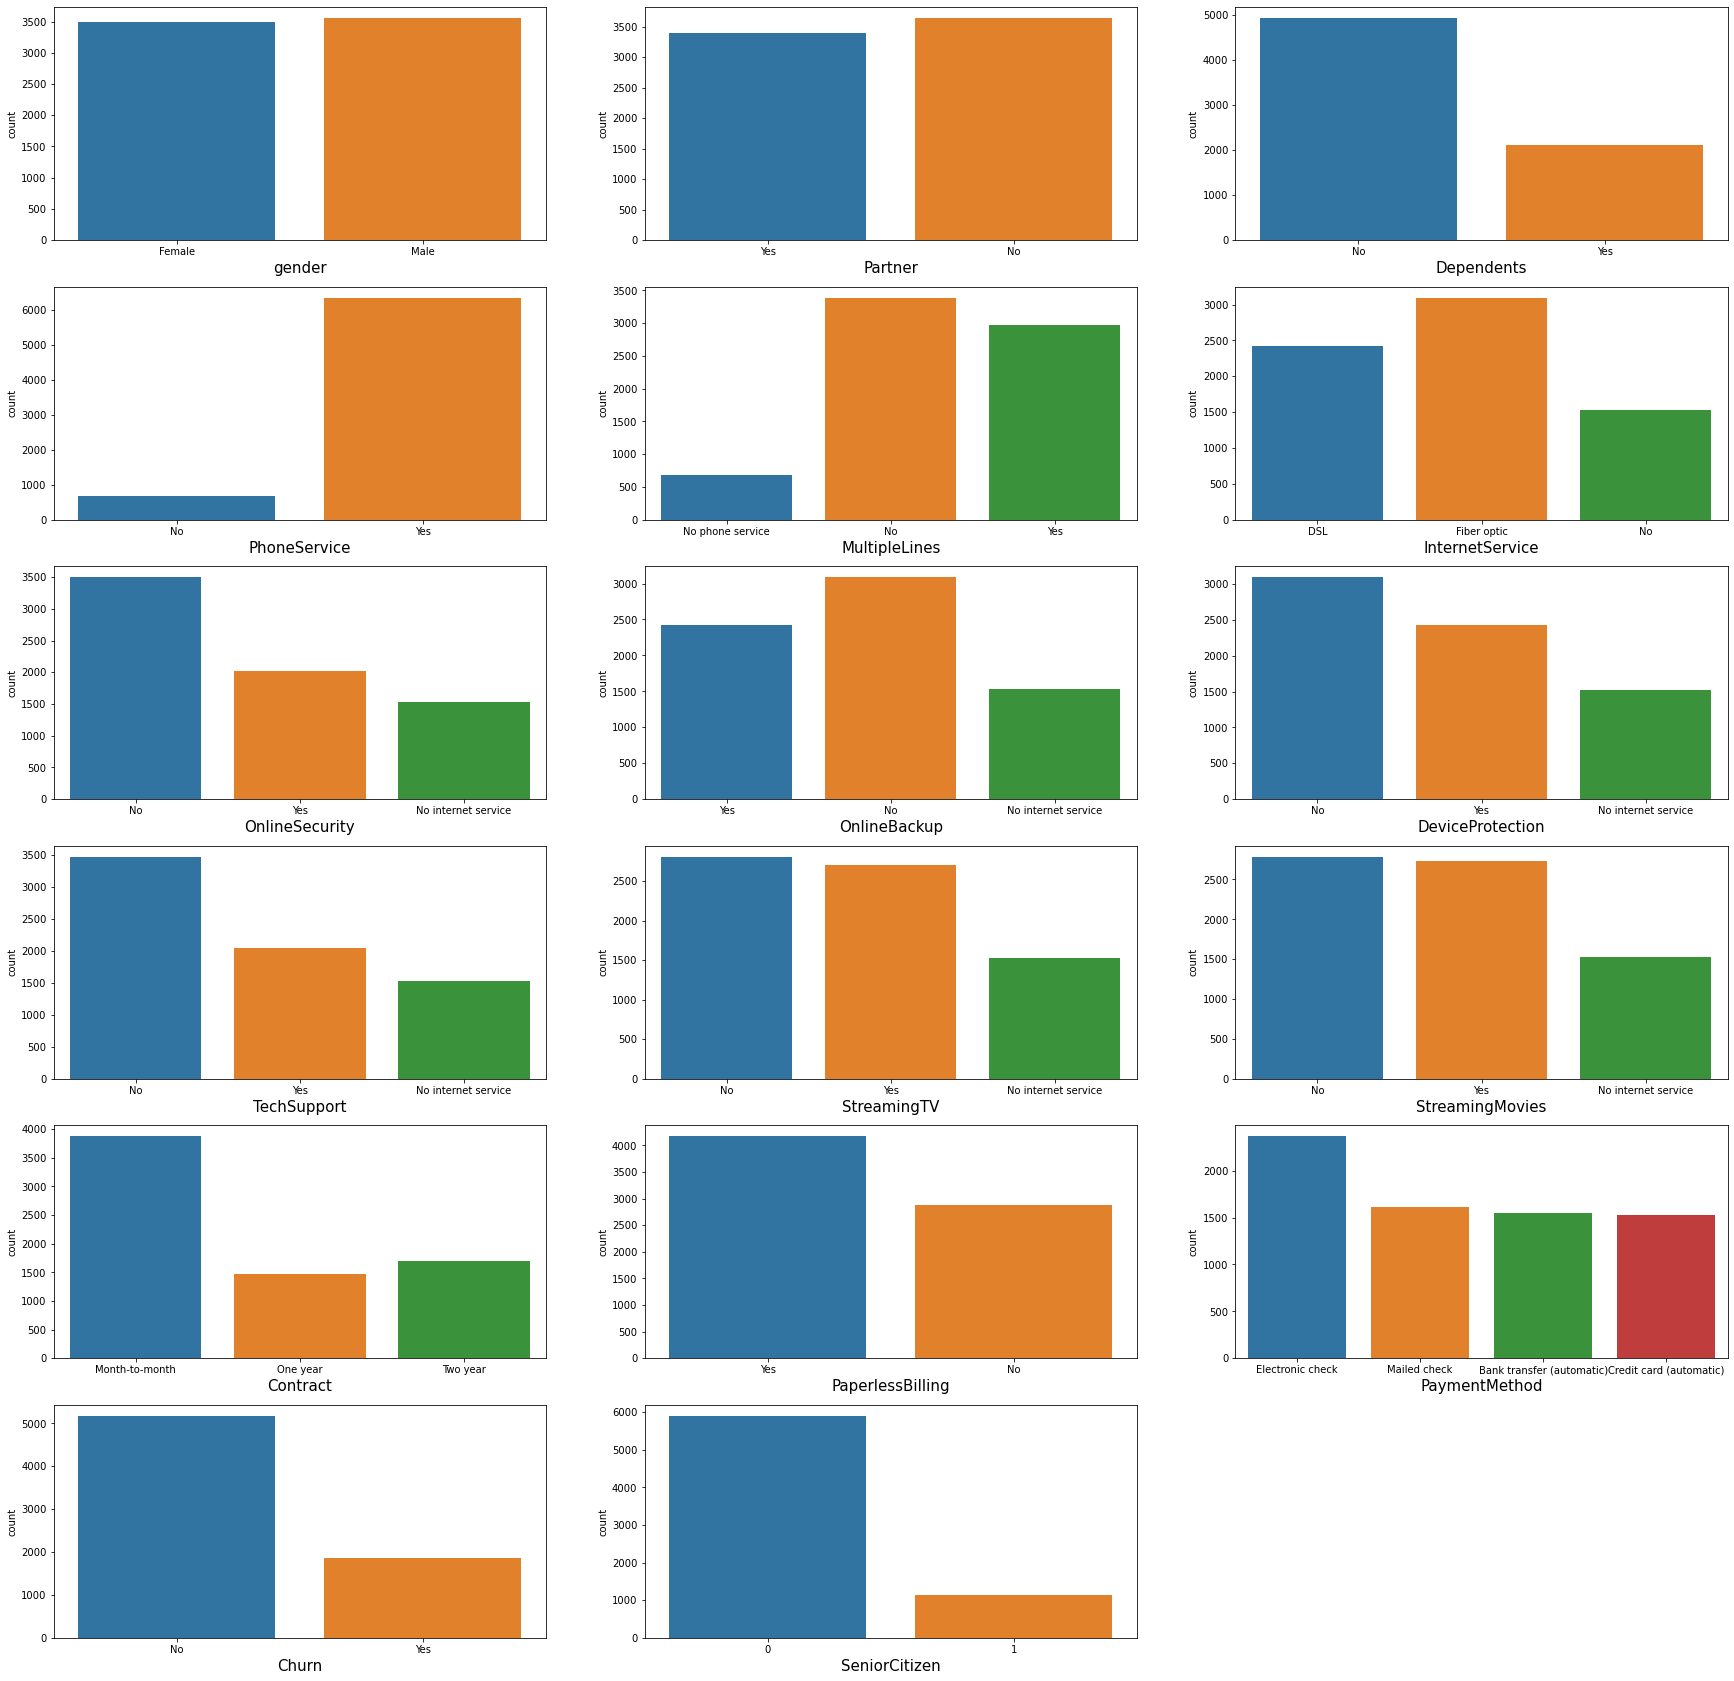

In [17]:
#Plotting count plots for categorical data

plt.figure(figsize=(30,30))
plotnumber = 1
for column in c_data:
    if plotnumber <=17:
        ax= plt.subplot(6,3,plotnumber)
        sns.countplot(data=c_data,x=c_data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show

Interpreting the graphs

Gender: There are equal number of male and female customers

Partner: The number of customers with and without partner are almost equal

Depends: Majority of the customers do not have depends

Phone Service: Most of the customer have phone service

Online Security: Most customers donot opt for online security

Contract: Majority of the customers have a monthly contract

Payment Method: Electronic check is preffered

SeniorCitizen: There are very few customers who are Senior citizens

Churn: This is our target and is imbalanced



<function matplotlib.pyplot.show(close=None, block=None)>

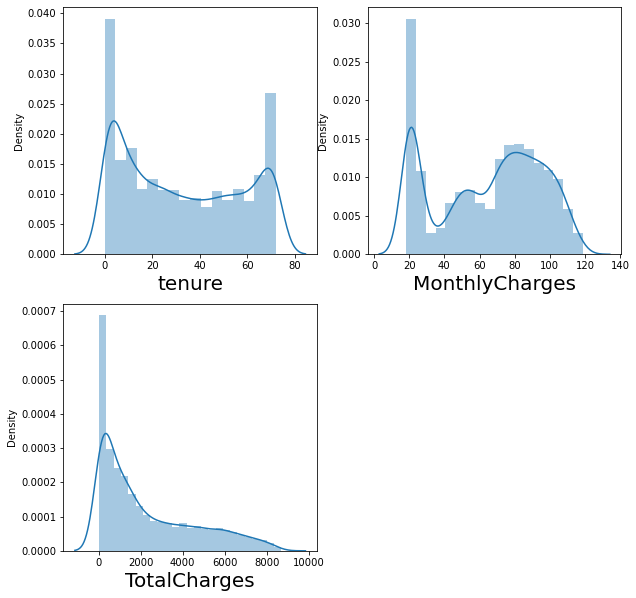

In [18]:
#Analysing numerical data
plt.figure(figsize=(10,10))
plotnumber = 1
for column in n_data:
    if plotnumber <=4:
        ax= plt.subplot(2,2,plotnumber)
        sns.distplot(n_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

Numerical columns are randomly distributed and there could be skewness in Total Charges

In [19]:
#Lets check for skewness
n_data.skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

Total Charges is slightly skewed and may have ouliers
let's find the outliers and try to correct the skewness

Encoding the categorical data

In [20]:
#Encoding careorical data:
L_encoder = LabelEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=L_encoder.fit_transform(data[i].values.reshape(-1,1))

In [21]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


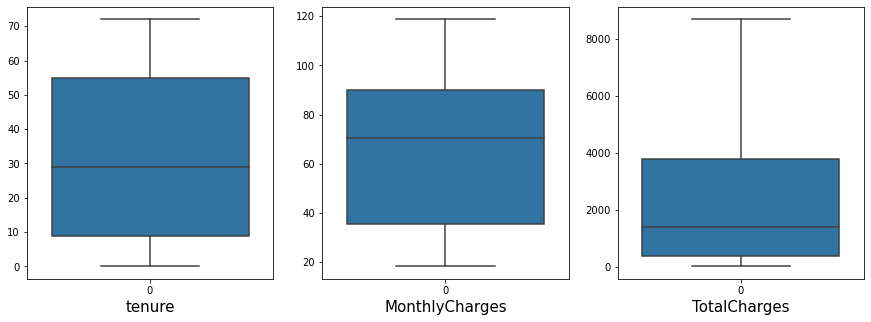

In [27]:
# Visualising outliers using box plot
# Checking for outliers using boxplot
plt.figure(figsize=(15,5))
graph =1
for column in n_data:
    if graph <=3:
        plt.subplot(1,3,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

Let's find the outliers using z-score

From the above graphs it is observed that the data does not have any outliers

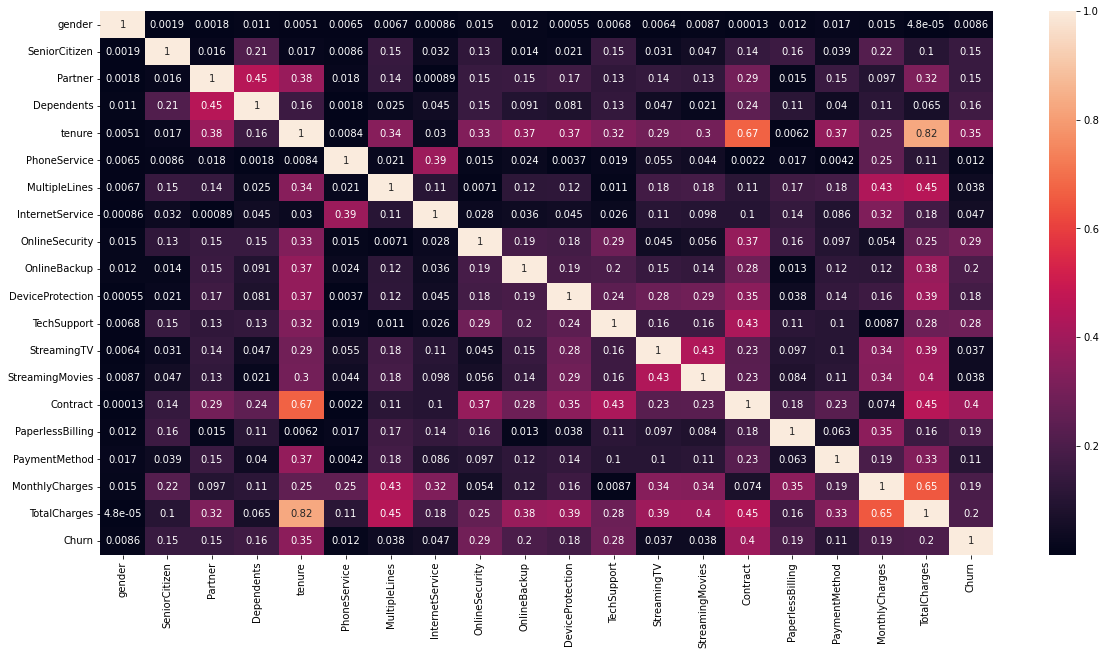

In [30]:
## Plotting heat map to check for multicollinerity and labelv//s feature relationship
df_corr = data.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()

The heatmap looks good 

1. We observe Contract and Total charges have strong relation with tenure
2. Total charges has a strong relation with Monthlycharges
Will check for mutlicollinearity in futhur steps


It is also observed that correlation between Churn and Gender is almost 0  

 Using Power Transformer to deal with skewness and then calculating vifs to check for  multicollinearity  

In [31]:
#Dividing data into features and label

X = data.drop(columns=['Churn'])
Y= data['Churn']

In [32]:

pt = PowerTransformer()

X_scaled = pd.DataFrame(pt.fit_transform(X), columns=X.columns)
X_scaled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.644343,-3.054010,0.334585,-1.252568,-0.977199,1.161936,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,-1.158541,-1.810588
1,0.990532,-0.439916,-0.966622,-0.654012,0.297205,0.327438,-1.015015,-1.252568,1.258702,-1.078800,1.163539,-0.983227,-1.151526,-1.158239,0.790424,-1.205113,1.318899,-0.239492,0.253313
2,0.990532,-0.439916,-0.966622,-0.654012,-1.495444,0.327438,-1.015015,-1.252568,1.258702,1.161936,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,-0.342665,-1.387269
3,0.990532,-0.439916,-0.966622,-0.654012,0.646327,-3.054010,0.334585,-1.252568,1.258702,-1.078800,1.163539,1.252625,-1.151526,-1.158239,0.790424,-1.205113,-1.489837,-0.731079,0.232253
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.495444,0.327438,-1.015015,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,0.213545,-1.250118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.078084,0.327438,1.081357,-1.252568,1.258702,-1.078800,1.163539,1.252625,1.099560,1.094066,0.790424,0.829798,1.318899,0.671510,0.295688
7039,-1.009559,-0.439916,1.034530,1.529024,1.342198,0.327438,1.081357,0.290254,-0.977199,1.161936,1.163539,-0.983227,1.099560,1.094066,0.790424,0.829798,-0.522116,1.260981,1.567097
7040,-1.009559,-0.439916,1.034530,1.529024,-0.725121,-3.054010,0.334585,-1.252568,1.258702,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,-1.167241,-0.859899
7041,0.990532,2.273159,1.034530,-0.654012,-1.265130,0.327438,1.081357,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,0.334312,-0.922968


In [33]:
#checking for skewness
X_scaled.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure             -0.243325
PhoneService       -2.727153
MultipleLines       0.033697
InternetService    -0.072384
OnlineSecurity      0.149362
OnlineBackup       -0.001417
DeviceProtection    0.001051
TechSupport         0.139751
StreamingTV        -0.097211
StreamingMovies    -0.105641
Contract            0.302174
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.259035
TotalCharges       -0.144899
dtype: float64

Skewness is under control

Observe that skewness for all numerical data is less than +/- 0.5

In [34]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['feature']= X.columns
vif

,vif,feature
0,1.001530,gender
1,1.150068,SeniorCitizen
2,1.458466,Partner
3,1.381221,Dependents
4,28.320262,tenure
5,1.618101,PhoneService
6,1.400996,MultipleLines
7,1.812188,InternetService
8,1.335372,OnlineSecurity
9,1.204159,OnlineBackup


Total Charges an Tenure have high Vifs 

Dropping Total Charges and checking the vifs

In [35]:
X_scaled=X_scaled.drop(columns=['TotalCharges'])

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1= pd.DataFrame()
vif1['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif1['feature']= X_scaled.columns
vif1

,vif,feature
0,1.001484,gender
1,1.150067,SeniorCitizen
2,1.458184,Partner
3,1.380038,Dependents
4,2.556637,tenure
5,1.618092,PhoneService
6,1.398296,MultipleLines
7,1.702834,InternetService
8,1.329194,OnlineSecurity
9,1.199007,OnlineBackup


The Vifs are all below 5

Lets look at the target variable

<AxesSubplot:xlabel='Churn', ylabel='count'>

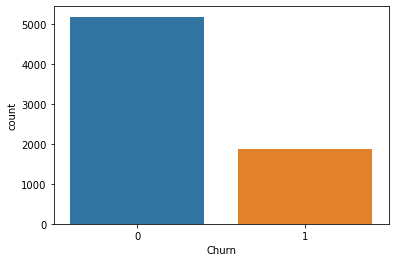

In [38]:
sns.countplot(Y)

Our target or label is not balanced

In [39]:
# Balancing the target column "loan_status" using SMOTE on training data
from imblearn.over_sampling import SMOTE

In [40]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X_scaled,Y, test_size=0.25, random_state = 285)

In [41]:
x_train_rs,y_train_rs= SMOTE().fit_resample(x_train,y_train)

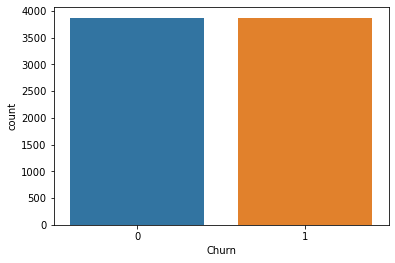

In [42]:
sns.countplot(y_train_rs)
plt.show()

The target column of training data is balanced

In [43]:
#traintestsplit
lg = LogisticRegression()
for i in range(100,500):
    x_train_rs,x_test,y_train_rs,y_test = train_test_split (X_scaled,Y, test_size=0.25, random_state = i)
    lg.fit(x_train,y_train)
    pred_train = lg.predict(x_train)
    pred_test = lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print ("At random state ",i,"the model performs well")
        print ("Acuraccy of training model :",accuracy_score(y_train,pred_train)*100)
        print ("Accuracy of testing model :",accuracy_score(y_test,pred_test)*100)
        print ("\n-----------------------------------------\n")

At random state  101 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 80.63600227143668

-----------------------------------------

At random state  102 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 81.2038614423623

-----------------------------------------

At random state  103 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 80.52243043725156

-----------------------------------------

At random state  107 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 80.91993185689948

-----------------------------------------

At random state  111 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 81.31743327654742

-----------------------------------------

At random state  113 the model performs well
Acuraccy of training model : 80.72699734948883

At random state  224 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 80.97671777399205

-----------------------------------------

At random state  225 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 81.2038614423623

-----------------------------------------

At random state  236 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 81.43100511073254

-----------------------------------------

At random state  238 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 80.91993185689948

-----------------------------------------

At random state  239 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 80.7495741056218

-----------------------------------------

At random state  244 the model performs well
Acuraccy of training model : 80.72699734948883


Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 80.63600227143668

-----------------------------------------

At random state  336 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 80.80636002271436

-----------------------------------------

At random state  337 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 81.37421919363997

-----------------------------------------

At random state  343 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 81.0335036910846

-----------------------------------------

At random state  346 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 81.2038614423623

-----------------------------------------

At random state  348 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 80.52243043725156

Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 81.4877910278251

-----------------------------------------

At random state  432 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 80.80636002271436

-----------------------------------------

At random state  434 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 80.52243043725156

-----------------------------------------

At random state  435 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 81.09028960817717

-----------------------------------------

At random state  438 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 80.7495741056218

-----------------------------------------

At random state  440 the model performs well
Acuraccy of training model : 80.72699734948883
Accuracy of testing model : 80.97671777399205

Selecting 285 as random state

In [44]:
#traintestsplit
x_train_rs,x_test,y_train_rs,y_test = train_test_split (X_scaled,Y, test_size=0.3, random_state = 285)

In [45]:
# Model Selection
def model_selection (algorithm, x_train_rs,y_train_rs,x_test,y_test):
    algorithm.fit(x_train_rs,y_train_rs)
    pred_train = algorithm.predict(x_train_rs)
    pred_test = algorithm.predict(x_test)
    auc_score = roc_auc_score(y_test,pred_test)
    
    print (algorithm)
    print ("Acuraccy of training model :",accuracy_score(y_train_rs,pred_train))
    print ("Accuracy of testing model :",accuracy_score(y_test,pred_test))
    print ("Classification report of test data :\n ",classification_report(y_test,pred_test))
    print ("Confusion Matrix \n",confusion_matrix(y_test,pred_test))
    
    # Calculate ROC curve
    fpr, tpr, xg1 = roc_curve(y_test, pred_test)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    print ("\nAUC score: ",auc_score)
    print ("\n -------------------------------------------------------------\n")

LogisticRegression()
Acuraccy of training model : 0.8073022312373225
Accuracy of testing model : 0.8078561287269286
Classification report of test data :
                precision    recall  f1-score   support

           0       0.84      0.91      0.87      1556
           1       0.67      0.53      0.59       557

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113

Confusion Matrix 
 [[1410  146]
 [ 260  297]]


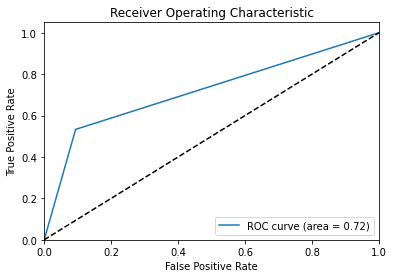


AUC score:  0.7196916551670028

 -------------------------------------------------------------

KNeighborsClassifier()
Acuraccy of training model : 0.8356997971602435
Accuracy of testing model : 0.763369616658779
Classification report of test data :
                precision    recall  f1-score   support

           0       0.82      0.86      0.84      1556
           1       0.56      0.48      0.52       557

    accuracy                           0.76      2113
   macro avg       0.69      0.67      0.68      2113
weighted avg       0.75      0.76      0.76      2113

Confusion Matrix 
 [[1343  213]
 [ 287  270]]


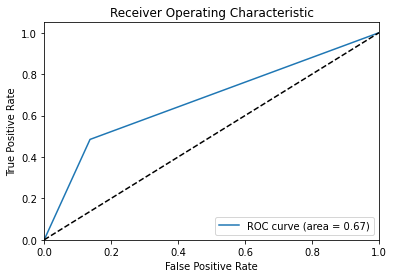


AUC score:  0.6739251083429869

 -------------------------------------------------------------

DecisionTreeClassifier()
Acuraccy of training model : 0.9979716024340771
Accuracy of testing model : 0.7283483199242783
Classification report of test data :
                precision    recall  f1-score   support

           0       0.82      0.81      0.81      1556
           1       0.49      0.50      0.49       557

    accuracy                           0.73      2113
   macro avg       0.65      0.66      0.65      2113
weighted avg       0.73      0.73      0.73      2113

Confusion Matrix 
 [[1260  296]
 [ 278  279]]


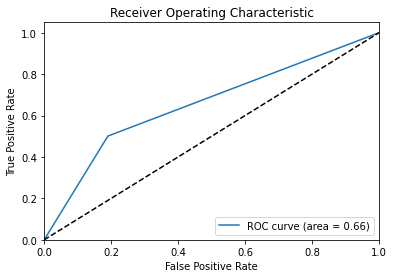


AUC score:  0.6553331518001781

 -------------------------------------------------------------

SVC()
Acuraccy of training model : 0.8273833671399594
Accuracy of testing model : 0.8021769995267393
Classification report of test data :
                precision    recall  f1-score   support

           0       0.83      0.93      0.87      1556
           1       0.69      0.45      0.55       557

    accuracy                           0.80      2113
   macro avg       0.76      0.69      0.71      2113
weighted avg       0.79      0.80      0.79      2113

Confusion Matrix 
 [[1442  114]
 [ 304  253]]


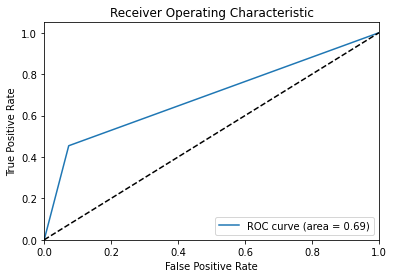


AUC score:  0.6904771245148219

 -------------------------------------------------------------

AdaBoostClassifier()
Acuraccy of training model : 0.8077079107505071
Accuracy of testing model : 0.8050165641268339
Classification report of test data :
                precision    recall  f1-score   support

           0       0.84      0.90      0.87      1556
           1       0.66      0.54      0.59       557

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113

Confusion Matrix 
 [[1402  154]
 [ 258  299]]


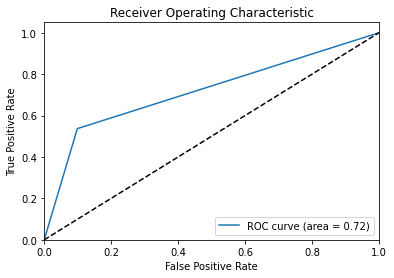


AUC score:  0.7189162932160444

 -------------------------------------------------------------

RandomForestClassifier()
Acuraccy of training model : 0.9979716024340771
Accuracy of testing model : 0.7884524372929484
Classification report of test data :
                precision    recall  f1-score   support

           0       0.83      0.90      0.86      1556
           1       0.63      0.48      0.55       557

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113

Confusion Matrix 
 [[1397  159]
 [ 288  269]]


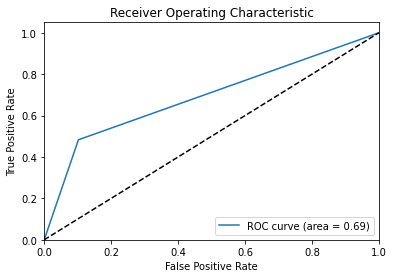


AUC score:  0.6903796273647386

 -------------------------------------------------------------

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Acuraccy of training model : 0.9448275862068966
Accuracy of testing model : 0.7818267865593942
Classification report of test data :
                pre

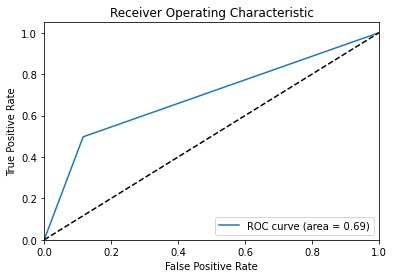


AUC score:  0.6904915471701596

 -------------------------------------------------------------



In [46]:
#Logistic Regression
lr= LogisticRegression()
model_selection(lr,x_train_rs,y_train_rs,x_test,y_test)

#KNN
knn= KNeighborsClassifier()
model_selection(knn,x_train_rs,y_train_rs,x_test,y_test)

#DecisionTree
dt= DecisionTreeClassifier()
model_selection(dt,x_train_rs,y_train_rs,x_test,y_test)

#SVC
svc= SVC()
model_selection(svc,x_train_rs,y_train_rs,x_test,y_test)

#Decision Tree
ada = AdaBoostClassifier()
model_selection(ada,x_train_rs,y_train_rs,x_test,y_test)

#Random Forest 
rfc= RandomForestClassifier()
model_selection(rfc,x_train_rs,y_train_rs,x_test,y_test)

#XGBoost
xg = xgb.XGBClassifier()
model_selection(xg,x_train_rs,y_train_rs,x_test,y_test)


Selecting Logistic Regressoin, AdaBoost and SVC for hyperparameter tunning as they have good accuracy for testing data and has less False Positives and False Negitives when compared to other models 

In [47]:
# Hyperparameter Tuning :
#Logistic Regression
parameters = {'penalty':['l1', 'l2', 'elasticnet'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              }

clf = GridSearchCV(lg,parameters,cv=5)
clf.fit(x_train_rs,y_train_rs)
print ("Logistic Regression: \n",clf.best_params_)


#AdaBoost
params = {'n_estimators':[50,75,100],
              'learning_rate':[0.05,0.1,0.01]
         }

clf = GridSearchCV(ada,params)
clf.fit(x_train,y_train)
print ("AdaBoost: \n",clf.best_params_)

#SVC
parameters = {'kernel':['rbf', 'ploy', 'sigmoid'],
              'gamma':['auto','scale'],
              'max_iter': (30, 75, 100)
    }

clf = GridSearchCV(svc,parameters,cv=5)
clf.fit(x_train_rs,y_train_rs)
print ("SVC: \n"clf.best_params_)

{'penalty': 'l1', 'solver': 'saga'}
AdaBoost: 
 {'learning_rate': 0.1, 'n_estimators': 75}
{'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 75}


LogisticRegression(penalty='l1', solver='saga')
Acuraccy of training model : 0.8068965517241379
Accuracy of testing model : 0.807382867960246
Classification report of test data :
                precision    recall  f1-score   support

           0       0.84      0.91      0.87      1556
           1       0.67      0.53      0.59       557

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113

Confusion Matrix 
 [[1409  147]
 [ 260  297]]


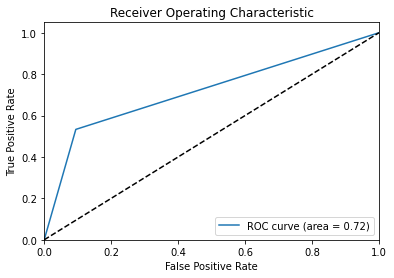


AUC score:  0.7193703184060773

 -------------------------------------------------------------

AdaBoostClassifier(learning_rate=0.1, n_estimators=75)
Acuraccy of training model : 0.8034835289663006
Accuracy of testing model : 0.7988641741599621
Classification report of test data :
                precision    recall  f1-score   support

           0       0.82      0.93      0.87      1556
           1       0.69      0.43      0.53       557

    accuracy                           0.80      2113
   macro avg       0.75      0.68      0.70      2113
weighted avg       0.79      0.80      0.78      2113

Confusion Matrix 
 [[1447  109]
 [ 316  241]]


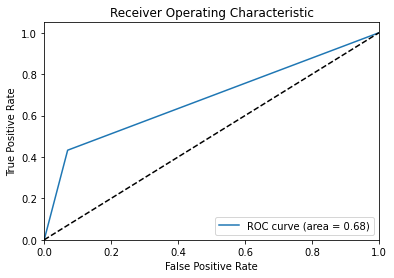


AUC score:  0.6813118155007777

 -------------------------------------------------------------

SVC(max_iter=75)
Acuraccy of training model : 0.762474645030426
Accuracy of testing model : 0.7657359204921912
Classification report of test data :
                precision    recall  f1-score   support

           0       0.86      0.81      0.84      1556
           1       0.55      0.63      0.59       557

    accuracy                           0.77      2113
   macro avg       0.70      0.72      0.71      2113
weighted avg       0.78      0.77      0.77      2113

Confusion Matrix 
 [[1268  288]
 [ 207  350]]


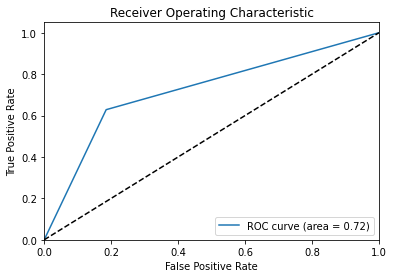


AUC score:  0.7216381367313878

 -------------------------------------------------------------



In [48]:
#Logistic Regression:
lg1 = LogisticRegression(penalty='l1', solver= 'saga')
model_selection(lg1,x_train_rs,y_train_rs,x_test,y_test)

#AdaBoost
ada1= AdaBoostClassifier(learning_rate=0.1,n_estimators=75)
model_selection(ada1,x_train,y_train,x_test,y_test)
#SVC:
svc1 = SVC(gamma='scale', kernel='rbf', max_iter=75)
model_selection(svc1,x_train_rs,y_train_rs,x_test,y_test)

Selecting Logistic Regression for prediction as it has 
1. The best testing accuracy 
2. Less number of False Postives and False Negitves

In [49]:
# Saving Model
import pickle
filename= 'Loan_pred.pkl'
pickle.dump(lg1,open(filename, 'wb'))

In [50]:
#Prediction
a= np.array(y_test)
predicted=np.array (lg1.predict(x_test))
df = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df

,Orignal,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
2108,0,0
2109,0,0
2110,0,0
2111,0,0


In [51]:
#Final Prediction
a= L_encoder.inverse_transform(np.array(y_test))
predicted=L_encoder.inverse_transform(np.array (lg.predict(x_test)))
df1 = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df1

,Orignal,Predicted
0,No,No
1,No,No
2,No,No
3,No,No
4,No,Yes
...,...,...
2108,No,No
2109,No,No
2110,No,No
2111,No,No
